<a href="https://colab.research.google.com/github/prateek1202/QOSF-mentorship-task/blob/main/qosf%20task%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#QOSF MENTORSHIP TASK #2
##Bit-flip or Phase-flip error correction code
In this task, we are asked to create a circuit, such that an error gets induced in the circuit randomly and we will have to modify the circuit such that the error gets resolved. Below is my work, in regards to the same.

#Important preliminaries

In [ ]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import matplotlib as mpl
import pylatexenc

In [ ]:
#Declaring the backends
backend=Aer.get_backend('qasm_simulator')
statevec_backend=Aer.get_backend('statevector_simulator')

# Initializing the Circuit: 
First, we need to initialize our Circuit.

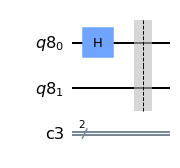

In [ ]:
qr=QuantumRegister(2)
cr=ClassicalRegister(2)
qc=QuantumCircuit(qr,cr)
 
qc.h(qr[0])
 
qc.barrier()
 
qc.draw('mpl')

# Introduction of the noise
According to the problem, this is where noise will get introduced in our circuit. The possible types of noises are:

XX: X|+>X|0>

XZ: X|+>Z|0>

ZX: Z|+>X|0>

ZZ: Z|+>Z|0>

XI: X|+>I|0>

IX: I|+>X|0>

ZI: Z|+>I|0>

IZ: I|+>Z|0>

II: I|+>I|0>

Amomg all the possible combinations memtiomed above, we can reject some simply because they will only apply a global phase change to the state, which will not show up in our measurement result.
Following this reasoning, we can neglect the XZ,XI,IZ and II combination of gates.Except these, every other combination will either apply a bit-flip or a phase-flip "error".

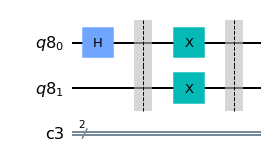

In [ ]:
import numpy as np
num=np.random.randint(1,100)
if num<=20:
    qc.x(0)
    qc.x(1)
elif num>20 and num<=40:
    qc.z(0)
    qc.x(1)
elif num>40 and num<=60:
    qc.z(0)
    qc.z(0)
elif num>60 and num<=80:
    qc.i(0)
    qc.x(1)
elif num>80:
    qc.z(0)
    qc.i(1)
qc.barrier()
qc.draw('mpl')

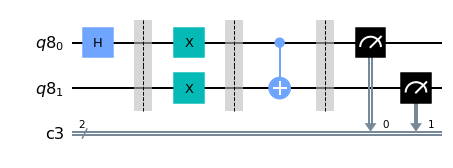

In [ ]:
#Applying the CNOT operation
 
qc.cx(0,1)
qc.barrier()
qc.measure([0,1],[0,1])
 
qc.draw('mpl')

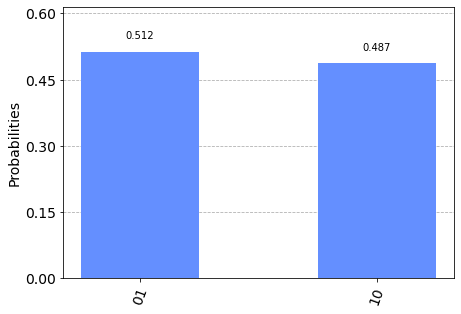

In [ ]:
backend=Aer.get_backend('qasm_simulator')
job=execute(qc,backend,shots=2000)
counts=job.result().get_counts()
plot_histogram(counts)

Upon studying the above histogram, we can infer that something is wrong with our circuit. It should give the output in __00 and 11__ state with almost equal probability distribution. But the output we get is in __01 and 10__ state.
 
During the preparation of Bell State, our 1st qubit is in |+> state. The CNOT-gate applies a not gate with respect to a control qubit which, in this case, is the 1st qubit. That's how we get our Bell state: 
 
1/√2(|00>+|11>)
 
But clearly, out output state is:
 
1/√2(|01>+|10>)
 
By comparing these two cases, we can infer that a **bit-flip error is affecting our 2nd Qubit!**

 # Mitigating the Error

We have found that the error in our circuit is a bit-flip error on our 2nd qubit. To mitigate this error, all we have to do is employ a simple error mitigation technique.

But first, let's recreate the circuit, to simulate how this would show up in a circuit.

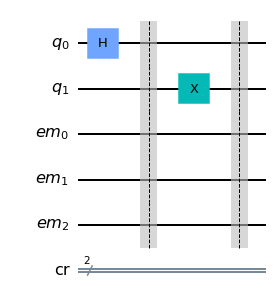

In [ ]:
#Declaring the Registers
qr=QuantumRegister(2, 'q')
em=QuantumRegister(3, 'em')
cr=ClassicalRegister(2, 'cr')
 
#Declaring the Circuit
qc=QuantumCircuit(qr,em,cr)
 
#Applying Hadamard Gate
qc.h(0)
qc.barrier()
 
#Introducing the error
qc.x(1)
qc.barrier()
 
qc.draw('mpl')

Now, we will apply our error correction code. This will include applying a couple of controlled-NOT operations on our qubits.

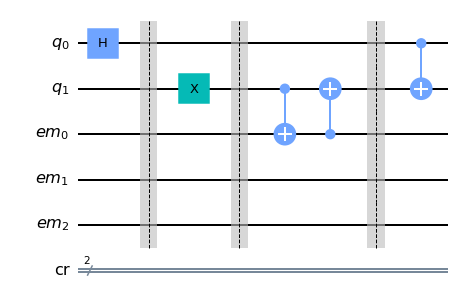

In [ ]:
#First CNOT
qc.cx(qr[1],em[0])
#Second CNOT
qc.cx(em[0],qr[1])
 
qc.barrier()
 
#CNOT-gate
qc.cx(0,1)
 
qc.draw('mpl')

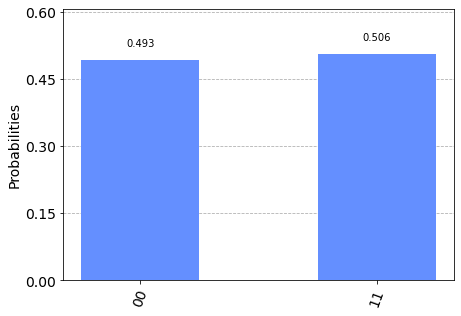

In [ ]:
 
#Measuring the circuit
qc.measure([0,1],[0,1])
 
 
job=execute(qc,backend,shots=2000)
counts=job.result().get_counts()
plot_histogram(counts)

SUCCESS!!🎉🎉


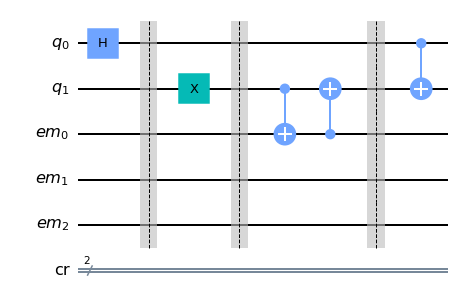

In [ ]:
 
print('SUCCESS!!🎉🎉')
qc.draw('mpl')

As we can see, we have successfully rectified the circuit. Below is the circuit diagram which shows how we initialized the circuit, encountered an unexpected error, rectified our error, and then completed the given task successfully!

#Visualizations👓

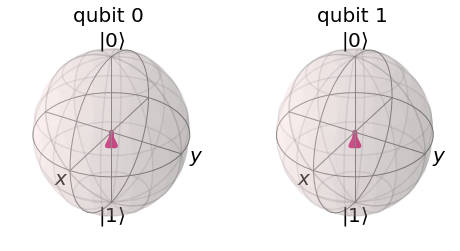

In [ ]:
from qiskit.quantum_info import partial_trace
job=execute(qc,statevec_backend)
statevector=job.result().get_statevector()
statevector=partial_trace(statevector,[2,3,4])
plot_bloch_multivector(statevector)

 At first sight, it might seems that something is wrong with above statevector diagram. The vector for the first and second qubit is not visible. This is because, due to the correct implementation of the last CNOT-gate, we have with us an entangled pair of states, also known in this case as, **Bell states**.
 
Due to them being an entangled pair, we can't represent the 2 qubits's vectors individually, as they no longer exist individually!

**THE BELL STATE**:

|$\psi$>=$\frac{1}{√2}$$(|00>+|11>)$

##Notebook by:
####Prateek Upadhyay